# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

[Nós fornecemos a você alguns comentários para guiar sua linha de raciocínio enquanto você completa esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise de seus dados, explique por si mesmo o objetivo do projeto e as ações que planeja realizar.]

[Por favor, tenha em mente que estudar, modificar, e analisar dados é um processo iterativo. É normal retornar aos passos anteriores e corrigir/expandir algo para permitir os próximos passos.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from datetime import datetime

from scipy import stats as st

from scipy.stats import t

from scipy.stats import ttest_ind

from scipy.stats import levene

## Carregar dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

ml_call = pd.read_csv("/datasets/megaline_calls.csv")

In [3]:
ml_internet = pd.read_csv('/datasets/megaline_internet.csv')

In [4]:
ml_msg = pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
ml_plan = pd.read_csv('/datasets/megaline_plans.csv')

In [6]:
ml_user = pd.read_csv('/datasets/megaline_users.csv')

## Preparar os dados

In [7]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos

ml_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [8]:
# Imprimir uma amostra de dados para os planos

ml_call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [9]:
# visualizando 'ml_internet'

ml_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
# imprimindo primeiras linhas de 'ml_internet'

ml_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [11]:
# visualizando 'ml_msg'

ml_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
# imprimindo primeiras linhas de 'ml_msg'

ml_msg.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [13]:
# visualizando 'ml_user'

ml_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
# imprimindo primeiras linhas de 'ml_user'

ml_user.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Observações iniciais,

* ml_call - tipo dados precisam ser ajustados para 'int' em 'id', 'call_date' precisa ser ajustado para formato de data
* ml_internet - novamente 'id' precisa ser ajustado para 'int', 'session_date precisa ser ajustado para formato de data
* ml_msg - 'id' será ajustado para tipo 'int', 'session_date será ajustado para formato de data
* ml_user - 'reg_date' e 'churn_date' será ajustado para formato de data

## Planos

In [15]:
# visualizando 'ml_plan'

ml_plan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [16]:
# imprimindo primeiras linhas de 'ml_plan'

ml_plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


renomear a coluna 'plan_name' para  'plan' para facilitar mergir as colunas

## Corrigir dados

In [17]:
# renomeando coluna 'plan_name' para 'plan'

ml_plan.rename(columns={ 'plan_name' : 'plan'}, inplace=True)

## Enriqueça os dados

## Usuários

In [18]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários

ml_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
# Imprimir uma amostra de dados para usuários

ml_user.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


tipo de dados coluna 'reg date' sera transformada para formato de data
Os dados ausentes da coluna 'churn date' serao substituidos pela data 01/01/2019 ja que a ultima data achada tanto na coluna 'churn_date como 'reg_date foi 31/12/2018

### Corrigir dados

In [20]:
# visualizando datas unicas em 'churn_date'

ml_user['churn_date'].sort_values().unique()

array(['2018-07-31', '2018-08-16', '2018-08-19', '2018-09-01',
       '2018-09-07', '2018-09-17', '2018-09-18', '2018-10-03',
       '2018-10-07', '2018-10-13', '2018-10-22', '2018-11-11',
       '2018-11-14', '2018-11-16', '2018-11-18', '2018-11-21',
       '2018-11-24', '2018-11-29', '2018-11-30', '2018-12-10',
       '2018-12-12', '2018-12-15', '2018-12-18', '2018-12-19',
       '2018-12-22', '2018-12-26', '2018-12-27', '2018-12-30',
       '2018-12-31', nan], dtype=object)

In [21]:
# visualizando datas unicas em 'reg_date'

ml_user['reg_date'].sort_values().unique()

array(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-07',
       '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
       '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15',
       '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
       '2018-01-20', '2018-01-21', '2018-01-24', '2018-01-25',
       '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29',
       '2018-01-31', '2018-02-02', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-08', '2018-02-09', '2018-02-10',
       '2018-02-11', '2018-02-13', '2018-02-14', '2018-02-15',
       '2018-02-16', '2018-02-17', '2018-02-19', '2018-02-20',
       '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
       '2018-02-27', '2018-03-01', '2018-03-03', '2018-03-04',
       '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
       '2018-03-09', '2018-03-11', '2018-03-12', '2018-03-13',
       '2018-03-15', '2018-03-16', '2018-03-17', '2018-03-18',
       '2018-03-20', '2018-03-25', '2018-03-26', '2018-

In [22]:
# preenchendo valor n/a em 'churn_date' pela primeira data depois da ultima data encontrada nos dados

fill_date = '01/01/2019'

ml_user['churn_date'].fillna(fill_date, inplace = True)

In [23]:
# substituindo tipo de dados em 'reg_date' para formato de data

ml_user['reg_date'] = pd.to_datetime(ml_user['reg_date'])

In [24]:
# substituindo tipo de dados em 'churn_date' para formato de data

ml_user['churn_date'] = pd.to_datetime(ml_user['churn_date'])

In [25]:
# verificando troca de tipo de dados em 'ml_user'

ml_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [26]:
ml_user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01


baseado nas datas unicas, todas em 2018, substitui valores ausentes em 'churn_date' por '01/01/2019' para que eu possa calcular quantos meses o usuario esta utilizando os servicos da empresa.

### Enriquecer Dados

Adicionar uma coluna para quantos meses de contrato cada cliente tem

In [27]:
ml_user['churn_date'] = pd.to_datetime(ml_user['churn_date'])

In [28]:
# adicionando coluna com numero de meses que usuario tem o plano

ml_user['months_contract'] = (ml_user['churn_date'].dt.to_period('M') - ml_user['reg_date'].dt.to_period('M')).apply(lambda x: x.n)

In [29]:
ml_user.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,months_contract
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,5
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,3
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,8
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2019-01-01,2
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2019-01-01,6
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2019-01-01,5
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2019-01-01,9


## Chamadas

In [30]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

ml_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [31]:
# Imprimir uma amostra de dados para chamadas

ml_call.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


coluna id será trocada por tipo 'int',e a coluna 'call_date' será mudada para formato de data

vou arredondar os valores de duração da chamada para cima e trocar seu tipo para 'int'

não foram achados valores ausentes

### Corrigir dados

[Corrija problemas óbvios com os dados de acordo com as observações iniciais.]

In [32]:
# substituindo tipo de dados em 'id'

ml_call['id'] = ml_call['id'].astype(int)

In [33]:
# substituindo tipo de dados em 'call_date' para formato de data

ml_call['call_date'] = pd.to_datetime(ml_call['call_date'])

In [34]:
ml_call['duration'] = np.ceil(ml_call['duration'])

In [35]:
# convertendo valores de minutos para 'int'

ml_call['duration'] = ml_call['duration'].astype(int)

In [36]:
# verificando se substituicao de dados ocorreram

ml_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.2 MB


In [37]:
ml_call.head()

,id,user_id,call_date,duration
0,100093,1000,2018-12-27,9
1,1000145,1000,2018-12-27,14
2,1000247,1000,2018-12-27,15
3,1000309,1000,2018-12-28,6
4,1000380,1000,2018-12-30,5


### Enriquecer dados

irei agrupar por usuario e somar o total de minutos de chamada por mês

In [38]:
# eliminando colunas com valores 0 (chamadas perdidas)

ml_call = ml_call[ml_call['duration'] != 0]

In [39]:
# agrupando somatoria dos minutos de chamada agrupados por mes

user_monthly_call_duration = ml_call.groupby(['user_id', ml_call['call_date'].dt.to_period('M')])['duration'].sum().reset_index()

In [40]:
# visualizando o agrupamento

user_monthly_call_duration.head(10)

,user_id,call_date,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
5,1001,2018-12,412
6,1002,2018-10,59
7,1002,2018-11,386
8,1002,2018-12,384
9,1003,2018-12,1104


## Mensagens

In [41]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens

ml_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [42]:
# Imprima uma amostra dos dados para as mensagens

ml_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


 valores em coluna 'id' novamente trocados para 'int e tipo de dados em 'message_date' para formato de data
 
 não foram achados valores ausentes

### Corrigir dados

In [43]:
# substituindo tipo de dados em 'id'

ml_msg['id'] = ml_msg['id'].astype(int)

In [44]:
# substituindo tipo de dados em 'session_date' para formato de data

ml_msg['message_date'] = pd.to_datetime(ml_msg['message_date'])

In [45]:
# verificando se tipo de dados foi trocado

ml_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


In [46]:
ml_msg.head(10)

,id,user_id,message_date
0,1000125,1000,2018-12-27
1,1000160,1000,2018-12-31
2,1000223,1000,2018-12-31
3,1000251,1000,2018-12-27
4,1000255,1000,2018-12-26
5,1000346,1000,2018-12-29
6,1000386,1000,2018-12-30
7,1000413,1000,2018-12-31
8,1000502,1000,2018-12-27
9,1000525,1000,2018-12-28


### Enriquecer dados

irei agrupar a quantidade de mensagens que cada usuario disparou por mês

In [47]:
# agrupando e somando a quantidade de mensagens enviadas por cada usurio por mes

user_monthly_message_count = ml_msg.groupby(['user_id', ml_msg['message_date'].dt.to_period('M')])['id'].count().reset_index()

In [48]:
# visualizando resultado do agrupamento

user_monthly_message_count.head()

,user_id,message_date,id
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [49]:
# renomeando coluna 'id' por 'msg_count'

user_monthly_message_count.rename(columns ={'id' : 'msg_count'}, inplace=True)

In [50]:
# verificando renomeacao

user_monthly_message_count.head()

,user_id,message_date,msg_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


## Internet

In [51]:
# Imprime as informações gerais/resumidas sobre o DataFrame da Internet

ml_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [52]:
# Imprime uma amostra de dados para o tráfego da Internet

ml_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 tipo de dados em 'id' serao trocados para 'int, coluna 'session_date' sera colocada em formato de data


### Corrigir dados

In [53]:
# substituindo dados em 'id' para int

ml_internet['id'] = ml_internet['id'].astype(int)

In [54]:
# substituindo dados em 'session_date' para formato de data

ml_internet['session_date'] = pd.to_datetime(ml_internet['session_date'])

In [55]:
# verificando se tipo de dados foi trocado

ml_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 MB


### Enriquecer dados

vou arredondar os valores de 'mb_used' para cima e transformar seus dados para 'int'

irei agrupar quantos mega-bytes foram usados por cada usuario mensalmente

In [56]:
# arredondando para cima a quantidade de mb usados 

ml_internet['mb_used'] = np.ceil(ml_internet['mb_used'])

In [57]:
# transformando dados em 'mb_used' para 'int'

ml_internet['mb_used'] = ml_internet['mb_used'].astype(int)

In [58]:
# agrupando consumo mensal de mb por usuario

user_monthly_internet_sum = ml_internet.groupby(['user_id', ml_internet['session_date'].dt.to_period('M')])['mb_used'].sum().reset_index()                                               

In [59]:
user_monthly_internet_sum.head()

,user_id,session_date,mb_used
0,1000,2018-12,1903
1,1001,2018-08,6929
2,1001,2018-09,13333
3,1001,2018-10,22356
4,1001,2018-11,18524


## Condições do plano de estudos

In [60]:
# Imprime as condições do plano e certifique-se de que estão claras para você

ml_plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Dados agregados por usuário



In [61]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

user_monthly_calls = ml_call.groupby(['user_id', ml_call['call_date'].dt.to_period('M')])['duration'].count().reset_index()

#user_monthly_calls = ml_call.groupby(['user_id', ml_call['call_date'].dt.month])['duration'].count().reset_index()


user_monthly_calls.rename(columns = {'duration' : 'calls'}, inplace = True)

user_monthly_calls.rename(columns = {'call_date' : 'month'}, inplace = True)

In [62]:
# visualizando chamadas mensais de cada usuario

user_monthly_calls

,user_id,month,calls
0,1000,2018-12,16
1,1001,2018-08,22
2,1001,2018-09,38
3,1001,2018-10,47
4,1001,2018-11,49
...,...,...,...
2251,1498,2018-12,32
2252,1499,2018-09,35
2253,1499,2018-10,41
2254,1499,2018-11,39


In [63]:
# renomeadno coluna 'call_date' para ' month'

user_monthly_call_duration.rename(columns = {'call_date' : 'month'}, inplace = True)

In [64]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

user_monthly_call_duration

,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
...,...,...,...
2251,1498,2018-12,339
2252,1499,2018-09,346
2253,1499,2018-10,385
2254,1499,2018-11,308


In [65]:
# renomeado coluna 'message_date' para 'month'

user_monthly_message_count.rename(columns = {'message_date' : 'month'}, inplace = True)

In [66]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

user_monthly_message_count

,user_id,month,msg_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [67]:
# renomeando coluna 'session_date' para 'month'

user_monthly_internet_sum.rename(columns = {'session_date' : 'month'}, inplace = True)

In [68]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

user_monthly_internet_sum

,user_id,month,mb_used
0,1000,2018-12,1903
1,1001,2018-08,6929
2,1001,2018-09,13333
3,1001,2018-10,22356
4,1001,2018-11,18524
...,...,...,...
2272,1498,2018-12,23160
2273,1499,2018-09,13004
2274,1499,2018-10,19515
2275,1499,2018-11,16834


In [69]:
# Junte os dados de chamadas, minutos, mensagens, internet com base em user_id e mês

merged_all_info = pd.merge(user_monthly_internet_sum, user_monthly_message_count, on = ['user_id', 'month'], how='outer')

merged_all_info = pd.merge(merged_all_info, user_monthly_call_duration, on=['user_id', 'month'], how='outer')

merged_all_info = pd.merge(merged_all_info, user_monthly_calls, on=['user_id', 'month'], how='outer')

merged_all_info.head(10)

,user_id,month,mb_used,msg_count,duration,calls
0,1000,2018-12,1903.0,11.0,124.0,16.0
1,1001,2018-08,6929.0,30.0,182.0,22.0
2,1001,2018-09,13333.0,44.0,315.0,38.0
3,1001,2018-10,22356.0,53.0,393.0,47.0
4,1001,2018-11,18524.0,36.0,426.0,49.0
5,1001,2018-12,19398.0,44.0,412.0,46.0
6,1002,2018-10,6559.0,15.0,59.0,8.0
7,1002,2018-11,19364.0,32.0,386.0,48.0
8,1002,2018-12,14416.0,41.0,384.0,38.0
9,1003,2018-12,27069.0,50.0,1104.0,118.0


In [70]:
# agrupando apenas 'user_id' e 'plan' em uma variavel para adicionar em 'merged_all_info'

plan = ml_user.groupby('user_id')['plan'].first().reset_index()

In [71]:
# visualizando agrupamento

plan.head()

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


In [72]:
# verificando quais valores unicos estao em 'plan'

plan['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

In [73]:
# verificando se ha valores ausentes  em alguma das colunas

plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  500 non-null    int64 
 1   plan     500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [74]:
# Adicione as informações do plano

merged_all_info = pd.merge(merged_all_info, plan, on='user_id', how='inner' )

In [75]:
# verificando se ha valores nulos

merged_all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   user_id    2293 non-null   int64    
 1   month      2293 non-null   period[M]
 2   mb_used    2277 non-null   float64  
 3   msg_count  1806 non-null   float64  
 4   duration   2256 non-null   float64  
 5   calls      2256 non-null   float64  
 6   plan       2293 non-null   object   
dtypes: float64(4), int64(1), object(1), period[M](1)
memory usage: 143.3+ KB


In [76]:
# visualizando valores minimos em 'calls'

merged_all_info['calls'].min()

1.0

In [77]:
# visualizando valores minimos em 'mb_used'

merged_all_info['mb_used'].min()

93.0

In [78]:
# visualizando valores minimos em 'msg_count'

merged_all_info['msg_count'].min()

1.0

In [79]:
# preenchendo valores nulos em todas as colunas com numero 0

merged_all_info = merged_all_info.fillna(0)

baseado nos valores minimos das colunas com valores ausentes, percebo que nao existe valor 0 em nenhum deles, irei substituir os valores ausentes por 0, para que possa fazer o calculo matematico mais para frente no projeto.

In [80]:
# verificando ausencia de valores nulos

merged_all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   user_id    2293 non-null   int64    
 1   month      2293 non-null   period[M]
 2   mb_used    2293 non-null   float64  
 3   msg_count  2293 non-null   float64  
 4   duration   2293 non-null   float64  
 5   calls      2293 non-null   float64  
 6   plan       2293 non-null   object   
dtypes: float64(4), int64(1), object(1), period[M](1)
memory usage: 143.3+ KB


In [81]:
# adicionando informacoes por plano de cada usuario

merged_all_info = pd.merge(merged_all_info, ml_plan, on='plan', how='outer')

In [82]:
# verificando se ha valores nulos

merged_all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2293 non-null   int64    
 1   month                  2293 non-null   period[M]
 2   mb_used                2293 non-null   float64  
 3   msg_count              2293 non-null   float64  
 4   duration               2293 non-null   float64  
 5   calls                  2293 non-null   float64  
 6   plan                   2293 non-null   object   
 7   messages_included      2293 non-null   int64    
 8   mb_per_month_included  2293 non-null   int64    
 9   minutes_included       2293 non-null   int64    
 10  usd_monthly_pay        2293 non-null   int64    
 11  usd_per_gb             2293 non-null   int64    
 12  usd_per_message        2293 non-null   float64  
 13  usd_per_minute         2293 non-null   float64  
dtypes: float64(6), int64(6),

In [83]:
merged_all_info.head(20)

,user_id,month,mb_used,msg_count,duration,calls,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12,1903.0,11.0,124.0,16.0,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1006,2018-11,2072.0,15.0,10.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2,1006,2018-12,32144.0,139.0,59.0,7.0,ultimate,1000,30720,3000,70,7,0.01,0.01
3,1008,2018-10,17131.0,21.0,476.0,54.0,ultimate,1000,30720,3000,70,7,0.01,0.01
4,1008,2018-11,23706.0,37.0,446.0,50.0,ultimate,1000,30720,3000,70,7,0.01,0.01
5,1008,2018-12,14707.0,26.0,634.0,65.0,ultimate,1000,30720,3000,70,7,0.01,0.01
6,1011,2018-06,6695.0,21.0,118.0,13.0,ultimate,1000,30720,3000,70,7,0.01,0.01
7,1011,2018-07,21076.0,53.0,499.0,49.0,ultimate,1000,30720,3000,70,7,0.01,0.01
8,1011,2018-08,21126.0,54.0,486.0,49.0,ultimate,1000,30720,3000,70,7,0.01,0.01
9,1011,2018-09,16663.0,60.0,484.0,55.0,ultimate,1000,30720,3000,70,7,0.01,0.01


In [84]:
# calculando minutos extra para serem cobrados

merged_all_info['overspent_minutes'] = merged_all_info['duration'] - merged_all_info['minutes_included'] 

In [85]:
# calculando mensagens extra para serem cobradas

merged_all_info['overspent_msg'] = merged_all_info['msg_count'] - merged_all_info['messages_included'] 

In [86]:
# calcilando mb extra para serem cobrados

merged_all_info['overspent_mb'] = merged_all_info['mb_used'] - merged_all_info['mb_per_month_included'] 

In [87]:
# visualizando novas colunas

merged_all_info.head()

,user_id,month,mb_used,msg_count,duration,calls,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,overspent_minutes,overspent_msg,overspent_mb
0,1000,2018-12,1903.0,11.0,124.0,16.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-2876.0,-989.0,-28817.0
1,1006,2018-11,2072.0,15.0,10.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-2990.0,-985.0,-28648.0
2,1006,2018-12,32144.0,139.0,59.0,7.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-2941.0,-861.0,1424.0
3,1008,2018-10,17131.0,21.0,476.0,54.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-2524.0,-979.0,-13589.0
4,1008,2018-11,23706.0,37.0,446.0,50.0,ultimate,1000,30720,3000,70,7,0.01,0.01,-2554.0,-963.0,-7014.0


In [88]:
# substituindo valores negativos da coluna 'overspent_minutes' por 0

merged_all_info['overspent_minutes'] = merged_all_info['overspent_minutes'].apply(lambda x: max(x, 0))

In [89]:
# substituindo valores negativos da coluna 'overspent_msg' por 0

merged_all_info['overspent_msg'] = merged_all_info['overspent_msg'].apply(lambda x: max(x, 0))

In [90]:
# substituindo valores negativos da coluna 'overspent_mb' por 0

merged_all_info['overspent_mb'] = merged_all_info['overspent_mb'].apply(lambda x: max(x, 0))

In [91]:
# transformando 'overspent_mb' em valores GB

merged_all_info['overspent_mb'] = merged_all_info['overspent_mb'] / 1024

In [92]:
# arrendondando valores GB para acima

merged_all_info['overspent_mb'] = np.ceil(merged_all_info['overspent_mb'])

In [93]:
# renomeando coluna 'overspent_mb' par 'overspent_gb'

merged_all_info.rename(columns = {'overspent_mb' : 'overspent_gb'}, inplace=True)

In [94]:
# visualizando atulizacoes feitas acima

merged_all_info.head(40)

,user_id,month,mb_used,msg_count,duration,calls,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,overspent_minutes,overspent_msg,overspent_gb
0,1000,2018-12,1903.0,11.0,124.0,16.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1006,2018-11,2072.0,15.0,10.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
2,1006,2018-12,32144.0,139.0,59.0,7.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,2.0
3,1008,2018-10,17131.0,21.0,476.0,54.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
4,1008,2018-11,23706.0,37.0,446.0,50.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
5,1008,2018-12,14707.0,26.0,634.0,65.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
6,1011,2018-06,6695.0,21.0,118.0,13.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
7,1011,2018-07,21076.0,53.0,499.0,49.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
8,1011,2018-08,21126.0,54.0,486.0,49.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
9,1011,2018-09,16663.0,60.0,484.0,55.0,ultimate,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0


In [95]:
# calculando valor a ser pago por minutos extra usado e salvando em nova coluna 'usd_minutes'

merged_all_info['usd_minutes'] = merged_all_info['overspent_minutes'] * merged_all_info['usd_per_minute']

In [96]:
# calculando valor a ser pago por mensagens extra usado e salvando em nova coluna 'usd_msg'

merged_all_info['usd_msg'] = merged_all_info['overspent_msg'] * merged_all_info['usd_per_message']

In [97]:
# calculando valor a ser pago gb extra usado e salvando em nova coluna 'usd_gb'

merged_all_info['usd_gb'] = merged_all_info['overspent_gb'] * merged_all_info['usd_per_gb']

In [98]:
# somando todos valores de gasto extra fora do plano

merged_all_info['total_overspent'] = merged_all_info['usd_gb'] + merged_all_info['usd_msg'] + merged_all_info['usd_minutes']

In [99]:
# somando total de gastos

merged_all_info['total'] = merged_all_info['total_overspent'] + merged_all_info['usd_monthly_pay']

In [100]:
# visualizando resultado das atualizacoes

merged_all_info.head(10)

,user_id,month,mb_used,msg_count,duration,calls,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,overspent_minutes,overspent_msg,overspent_gb,usd_minutes,usd_msg,usd_gb,total_overspent,total
0,1000,2018-12,1903.0,11.0,124.0,16.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
1,1006,2018-11,2072.0,15.0,10.0,2.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2,1006,2018-12,32144.0,139.0,59.0,7.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,2.0,0.0,0.0,14.0,14.0,84.0
3,1008,2018-10,17131.0,21.0,476.0,54.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,1008,2018-11,23706.0,37.0,446.0,50.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
5,1008,2018-12,14707.0,26.0,634.0,65.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
6,1011,2018-06,6695.0,21.0,118.0,13.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
7,1011,2018-07,21076.0,53.0,499.0,49.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
8,1011,2018-08,21126.0,54.0,486.0,49.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
9,1011,2018-09,16663.0,60.0,484.0,55.0,ultimate,1000,30720,3000,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0


In [101]:
# Calcule a receita mensal de cada usuário

monthly_total_user = merged_all_info.pivot_table(index = 'user_id', columns = 'month', values = 'total', aggfunc='mean')


In [102]:
monthly_total_user.head()

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,90.09,60.0,60.00
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,60.0,20.00
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.12
1004,NaN,NaN,NaN,NaN,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00


In [103]:
# substituindo valores nulos por 0

monthly_total_user = monthly_total_user.fillna(0)

In [104]:
monthly_total_user.tail()

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
user_id,,,,,,,,,,,,
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,143.3,120.0,110.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,40.0,20.0,20.0,40.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
1498,0.0,70.0,70.0,70.0,90.0,20.0,120.0,70.0,100.0,80.0,60.0,100.0
1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,70.0,40.0,90.0


## Estudar o comportamento do usuário

### Chamadas

In [105]:
# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.

mean_month_duration = pd.pivot_table(merged_all_info, index='plan',  values='duration', columns='month', aggfunc='mean')

mean_month_duration.head()

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,203.0,297.000000,330.00,351.540000,399.584416,431.298969,449.983471,410.111111,414.226804,429.729958,423.325088,473.836478
ultimate,193.5,403.142857,304.25,336.857143,406.241379,370.957447,427.067797,421.436620,437.511628,450.735849,445.196850,459.099338


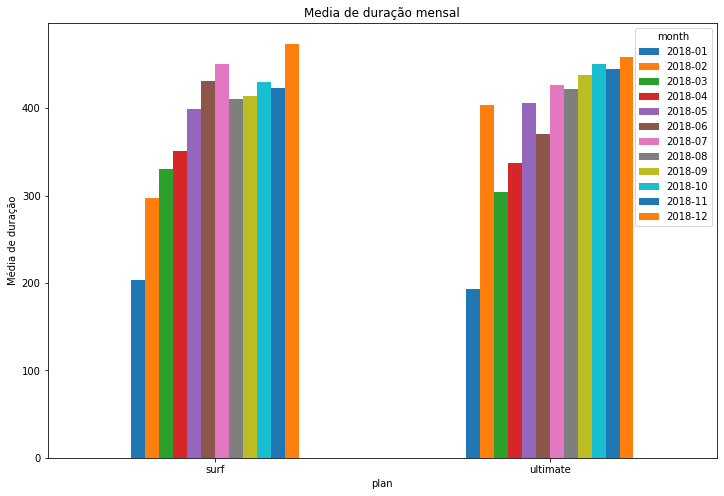

In [106]:
# visualizando media mensal de duracao de chamadas entre todos os usuarios

mean_month_duration.plot(kind='bar', figsize=(12,8))

plt.title('Media de duração mensal')
plt.ylabel('Média de duração')
plt.xticks(rotation=0)
plt.show()

em uma analise de média mensal

* Janeiro, uma pequena variação entre os planos, usuario do plano 'surf' consomem em média mais minutos.
* Fevereiro, nesse mês é possível ver um grande salto nos usuarios do plano 'ultimate' comparado com 'surf' do mesmo mês eles consumiram em média mais que 100 minutos de diferença. E um grande salto também quando comparado com usuários do mesmo plano, porém o uso do mês anterior, uma diferença positiva de 210 minutos.
* Março, usuários do plano surf voltam a consumir mais, porém a diferença é maior em apenas 26 minutos.
* Abril, a tendência continua e usuários do surf gastam em média mais 15 minutos do que usuários do ultimate.
* Maio, usuários do plano ultimate gastam mais do que o do surf, porém em apenas 7 minutos positivos.
* Junho, novamente os usuários do surf gastam mais, em média 60 minutos mais que os usuários do ultimate. Sendo até agora o mês com a maior média.
* Julho, primeira vez que usuários dos dois planos gastam em média mais de 400 minutos. Usuários do surf gastam em média mais 22 minutos do que usuários do ultimate.
* Agosto, usuários do ultimate gastam mais do que os do plano surf por 11 minutos. Médias continuam acima dos 400.
* Setembro, ultima gastam mais em média novamente, agora por 23 minutos.
* Outubro, segue a tendência dos ultimos meses e usuários do ultimate gastam em média 21 minutos mais. Valor médio de minutos ultrapassa os 450.
* Novembro, parecido resultado com o mês anterior, ultimate gastam em média mais 22 minutos.
* Dezembro, esse é o mês em que os usuários gastam mais, e os usuários do surf voltam a gastar mais e batem o recorde de média de minutos por mês com 473 e os usuarios do ultimate batem os 459 minutos.



em uma análise geral, é claramente visivel que conforme o decorrer do ano os usuários gastam mais minutos, tendo picos em Julho e Dezembro, talvez por serem meses relacionados a férias e comemorações, talvez exista uma demanda maior por contactar familiaries e amigos que moram longe.

In [107]:
# criando tabela dinamica com a soma da duração das chamadas

total_duration_month = pd.pivot_table(merged_all_info, index='plan', values='duration', columns='month', aggfunc='sum')

total_duration_month.describe()

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
mean,590.000000,2747.50000,5620.500000,12325.500000,21274.500000,29635.500000,39822.500000,48180.000000,58993.000000,74812.000000,88170.500000,110002.00000
std,260.215295,105.35891,2785.293611,7426.742523,13425.836454,17254.112568,20683.580456,25820.711222,30217.501187,38231.849445,44732.282085,57527.37929
min,406.000000,2673.00000,3651.000000,7074.000000,11781.000000,17435.000000,25197.000000,29922.000000,37626.000000,47778.000000,56540.000000,69324.00000
25%,498.000000,2710.25000,4635.750000,9699.750000,16527.750000,23535.250000,32509.750000,39051.000000,48309.500000,61295.000000,72355.250000,89663.00000
50%,590.000000,2747.50000,5620.500000,12325.500000,21274.500000,29635.500000,39822.500000,48180.000000,58993.000000,74812.000000,88170.500000,110002.00000
75%,682.000000,2784.75000,6605.250000,14951.250000,26021.250000,35735.750000,47135.250000,57309.000000,69676.500000,88329.000000,103985.750000,130341.00000
max,774.000000,2822.00000,7590.000000,17577.000000,30768.000000,41836.000000,54448.000000,66438.000000,80360.000000,101846.000000,119801.000000,150680.00000


In [108]:
total_duration_month.head()

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,406.0,2673.0,7590.0,17577.0,30768.0,41836.0,54448.0,66438.0,80360.0,101846.0,119801.0,150680.0
ultimate,774.0,2822.0,3651.0,7074.0,11781.0,17435.0,25197.0,29922.0,37626.0,47778.0,56540.0,69324.0


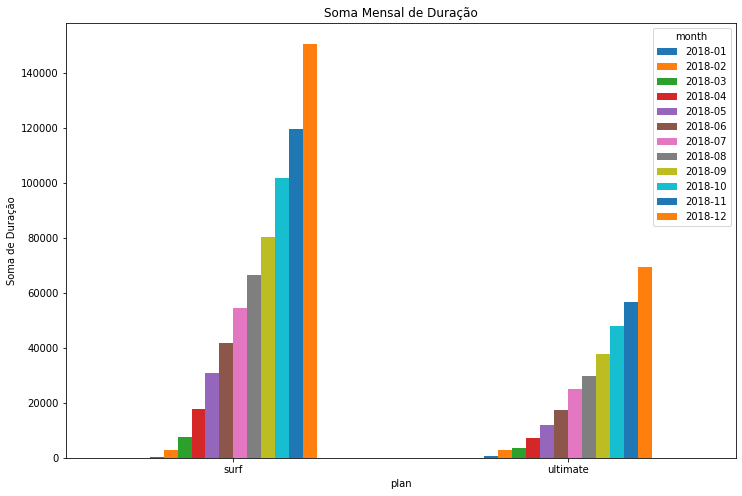

In [109]:
# plotando soma mensal de duração das chamadas por plano

total_duration_month.plot(kind='bar', figsize=(12,8))

plt.title('Soma Mensal de Duração')
plt.ylabel('Soma de Duração')
plt.xticks(rotation=0)
plt.show()

Claramente, visualizamos que usuários do plano surf consomem muito mais minutos no total por mês, a partir do mês de Março se torna muito evidente o salto. Também vemos melhor a tendência de gastarem mais minutos conforme o ano vai passado, atingindo o pico de uso em Dezembro.

In [110]:
# calculanto media e variacao

merged_all_info.groupby('plan')['duration'].agg(['mean' ,'std'])

,mean,std
plan,,
surf,428.749523,234.453150
ultimate,430.450000,240.508762


In [111]:
# agruapando os a media por mes de consumo e o desvio padrão

merged_all_info.groupby(['month', 'plan'])['duration'].agg(['mean' ,'std'])

mean         std
month   plan                            
2018-01 surf      203.000000  125.865007
        ultimate  193.500000  128.733575
2018-02 surf      297.000000  228.531179
        ultimate  403.142857  277.289517
2018-03 surf      330.000000  189.233622
        ultimate  304.250000  248.967732
2018-04 surf      351.540000  225.536567
        ultimate  336.857143  186.785783
2018-05 surf      399.584416  244.446763
        ultimate  406.241379  209.382537
2018-06 surf      431.298969  213.524304
        ultimate  370.957447  206.163924
2018-07 surf      449.983471  246.992105
        ultimate  427.067797  269.375898
2018-08 surf      410.111111  233.119381
        ultimate  421.436620  231.614997
2018-09 surf      414.226804  215.860971
        ultimate  437.511628  238.894254
2018-10 surf      429.729958  228.645280
        ultimate  450.735849  232.941861
2018-11 surf      423.325088  227.171789
        ultimate  445.196850  246.156907
2018-12 surf      473.836478  252.248923
        ultimate  459.099338  250.007567

In [112]:
# filtrando dados por plano surf

surf_merged_filter = merged_all_info.query('plan == "surf"')

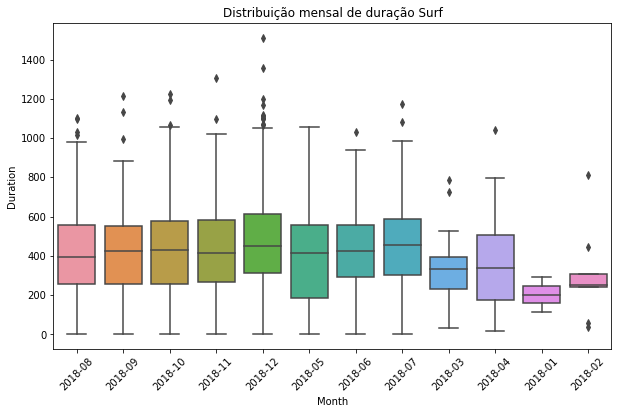

In [113]:
# plotando distribuição mensal da duração das chamadas dos clientes 'surf'

plt.figure(figsize=(10, 6))
sns.boxplot(data=surf_merged_filter, x='month', y='duration')
plt.title('Distribuição mensal de duração Surf')
plt.xlabel('Month')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()

Notamos uma quantidade relevante de outliers nos dados dos usuarios do plano surf. As medianas para os primeiros 7 meses do ano sao similares.

In [114]:
# filtrando dadaos por plano 'ultimate'

ultimate_merged_filter = merged_all_info.query('plan == "ultimate"')

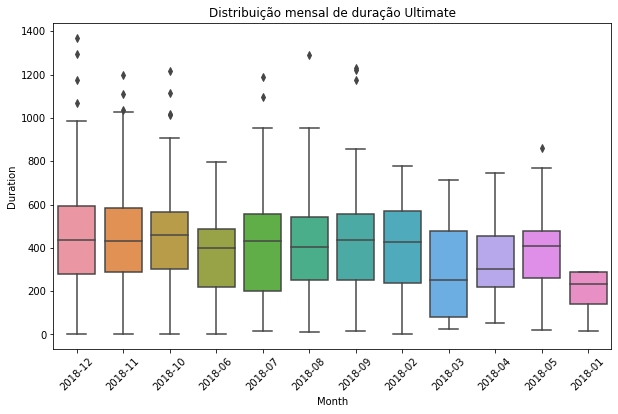

In [115]:
# plotando distribuição mensal da duração das chamadas dos clientes 'ultimate'


plt.figure(figsize=(10, 6))
sns.boxplot(data=ultimate_merged_filter, x='month', y='duration')
plt.title('Distribuição mensal de duração Ultimate')
plt.xlabel('Month')
plt.ylabel('Duration')
plt.xticks(rotation=45) 
plt.show()


Observamos uma quantidade menor de outliers entre os usuários do plano ultimate comparado com os usuarios do plano surf. Também é possível notal que a mediana dos primeiros 7 meses do ano são similares e maiores do que as medianas do plano surf dos respectivos meses.

### Mensagens

In [116]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

mean_messages_plan = pd.pivot_table(merged_all_info, index='plan', columns= 'month', values='msg_count', aggfunc='mean')

mean_messages_plan.head()


month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,10.5,12.000000,15.26087,17.400000,24.012987,25.298969,27.033058,28.777778,30.762887,33.839662,32.385159,38.600629
ultimate,15.5,21.571429,20.25000,22.047619,32.103448,29.340426,32.830508,38.478873,37.895349,39.443396,38.606299,45.006623


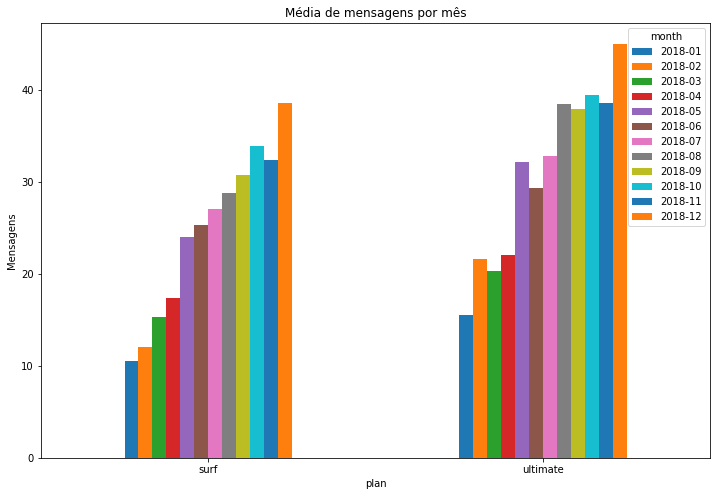

In [117]:
# visualizando média mensal de duração de mensagens por mês entre todos os usuarios

mean_messages_plan.plot(kind='bar', figsize=(12,8))

plt.title('Média de mensagens por mês')
plt.ylabel('Mensagens')
plt.xticks(rotation=0)
plt.show()


em uma analise de média mensal

* Janeiro, usuários do plano ultimate gastam mais em janeiro.
* Fevereiro, novamente em fevereiro. Porém com uma mpedia de 9 mensagens a mais do que os usuários do plano surf. 
* Março, ultimate novamente consome mais porém a diferença agora cai para apenas 5 mensagens a mais.
* Abril, a diferença aumenta e temos mais usuários do plano ultimate novamente usando mais o serviço.
* Maio, usuários do plano ultimate gastam mais do que o do surf, a diferença aumenta para mais de 8 mensagens na média.
* Junho, usuários do ultimate gastam menos que o mês anterior e a diferença diminue entre para apenas 4 mensagens.
* Julho, ultimate retomam a media de dois meses anteriores e usuários do plano surf alcançam a maior média de mensagens até agora.
* Agosto, a tendência segue e nesse mÊs ultimate gastoou em média mais que 10 mensagens do que os usuários do plano surf.
* Setembro, usuários dos dois planos ultrapassam a barreira das 30 mensagens médias por mês. Ultimate ainda gasta mais.
* Outubro, ultimate ainda gastam mais porém não há muita diferença comparada com o mês anterior.
* Novembro, muito similar ao mês anterior.
* Dezembro, mês em que os usuários alcançam a maior das médias por mês.

Clientes do plano ultimate mandam mais mensagens do que clientes do plano surf.

In [118]:
# criando tabela dinamica das soma de mensagens por mês por plano

sum_messages_plan = pd.pivot_table(merged_all_info, index='plan', columns= 'month', values='msg_count', aggfunc='sum')

sum_messages_plan.head()

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,21.0,108.0,351.0,870.0,1849.0,2454.0,3271.0,4662.0,5968.0,8020.0,9165.0,12275.0
ultimate,62.0,151.0,243.0,463.0,931.0,1379.0,1937.0,2732.0,3259.0,4181.0,4903.0,6796.0


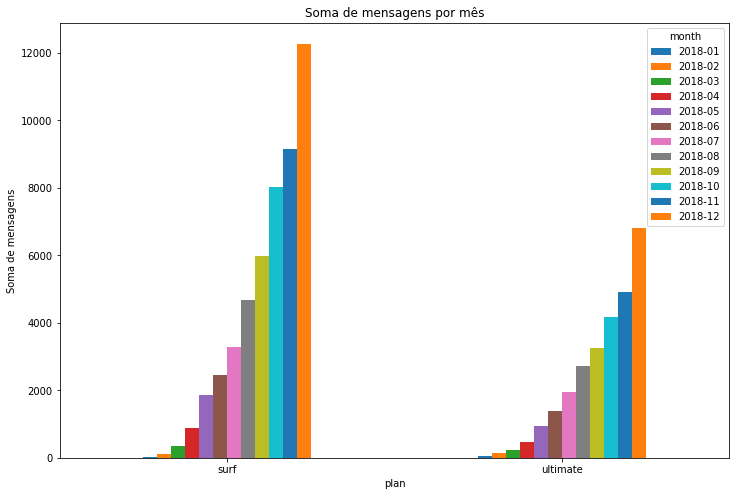

In [119]:
# plotando soma de mensagens por mês por plano

sum_messages_plan.plot(kind='bar', figsize=(12,8))

plt.title('Soma de mensagens por mês')
plt.ylabel('Soma de mensagens')
plt.xticks(rotation=0)
plt.show()

observamos que os usúarios do plano surf mandam mais mensagens quando somados. O que diferencia da média. Isso significa que existem mais usuários do plano surf do que ultimate.

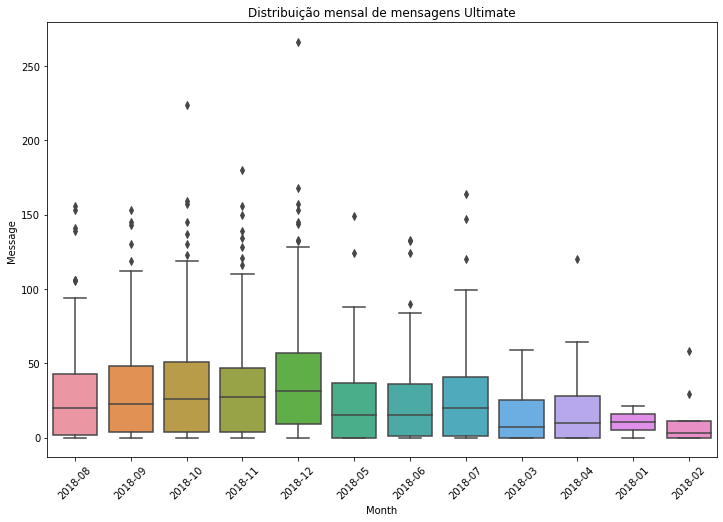

In [120]:
# plotando distribuição mensal de mensagens dos clientes 'surf'

plt.figure(figsize=(12, 8))
sns.boxplot(data=surf_merged_filter, x='month', y='msg_count')
plt.title('Distribuição mensal de mensagens Ultimate')
plt.xlabel('Month')
plt.ylabel('Message')
plt.xticks(rotation=45) 
plt.show()

Observamos grande quantidade de outliers de novo e valores. Também chama atenção os quartis serem achatados e próximos ao valor 0.

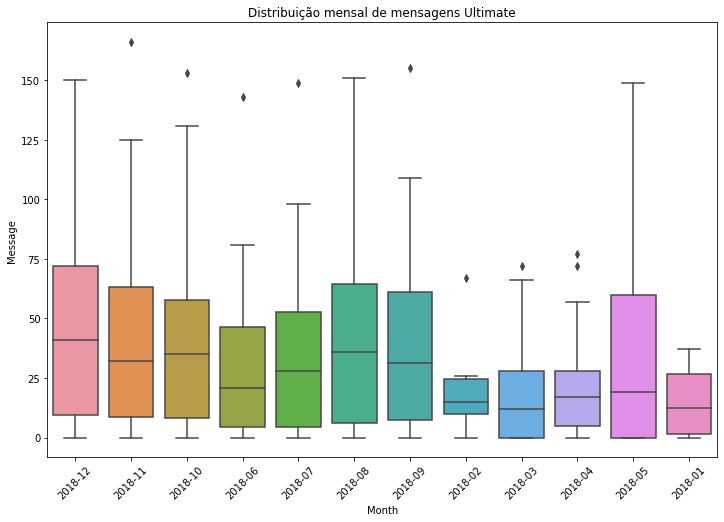

In [121]:
# plotando distribuição mensal de mensagens dos clientes 'ultimate'

plt.figure(figsize=(12, 8))
sns.boxplot(data=ultimate_merged_filter, x='month', y='msg_count')
plt.title('Distribuição mensal de mensagens Ultimate')
plt.xlabel('Month')
plt.ylabel('Message')
plt.xticks(rotation=45) 
plt.show()

Já entre os usuários do plano ultimate notamos baixa quantidade de outliers no périodo do ano, grande quartis que e valores máximos bem alto em pelo menos 5 meses do ano.

### Internet

In [122]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

mean_internet_plan = pd.pivot_table(merged_all_info, index='plan', columns='month', values='mb_used', aggfunc='mean')

mean_internet_plan

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,4881.00,12192.888889,13361.043478,11998.20000,13953.246753,15319.567010,16803.181818,16814.864198,16610.912371,17331.721519,16358.540636,18153.786164
ultimate,6926.25,17148.857143,18340.250000,16140.47619,16643.758621,15355.106383,16363.677966,17834.887324,16989.395349,17633.188679,17053.614173,18344.735099


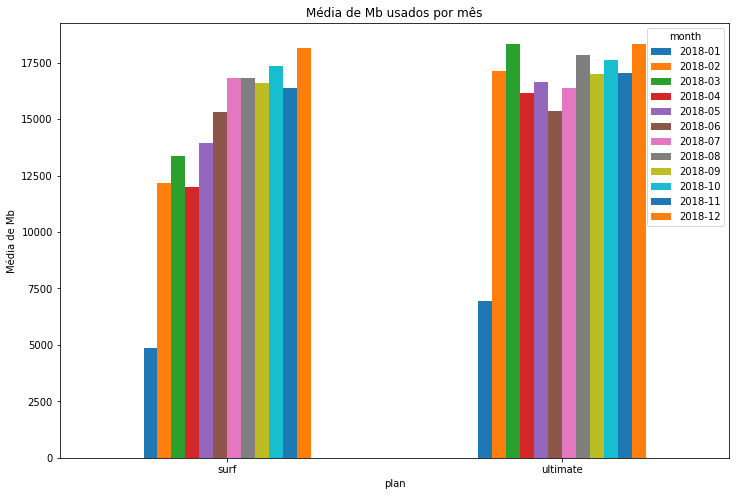

In [123]:
# visualizando média de uso de internet por plano

mean_internet_plan.plot(kind='bar', figsize=(12,8))

plt.title('Média de Mb usados por mês')
plt.ylabel('Média de Mb')
plt.xticks(rotation=0)
plt.show()

em uma analise de média mensal

* Janeiro, média mais baixa de todos os meses, porém clientes ultimate ficam a frente.
* Fevereiro, grande salto de uso comparado com o mês anterior, mais do que o dobro de uso.
* Março, usuários do plano ultimate atingem a segunda maior média de uso no ano dentre os usuários do seu plano.
* Abril, ultimate continua gastando mais que média do plano surf.
* Maio, novamente ultimate consome mais internet.
* Junho, consumo de internet quase igual entre os planos.
* Julho, muito parecido o consumo entre os planos.
* Agosto, usuários do plano ultimate atingem a segunda maior média do ano até agora.
* Setembro, consumo muito similar entre os planos novamente, ultimatefica com média maior por pouco.
* Outubro, consumo muito similar entre os planos.
* Novembro, ultimate gasta mais em média esse mês.
* Dezembro, maior média de consumo de MB dos dois planos, ultimate ainda consome mais.


In [124]:
# criando tabela dinamica da soma do uso de internet por mês por plano

sum_internet_plan = pd.pivot_table(merged_all_info, index='plan', columns='month', values='mb_used', aggfunc='sum')

sum_internet_plan

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,9762.0,109736.0,307304.0,599910.0,1074400.0,1485998.0,2033185.0,2724008.0,3222517.0,4107618.0,4629467.0,5772904.0
ultimate,27705.0,120042.0,220083.0,338950.0,482669.0,721690.0,965457.0,1266277.0,1461088.0,1869118.0,2165809.0,2770055.0


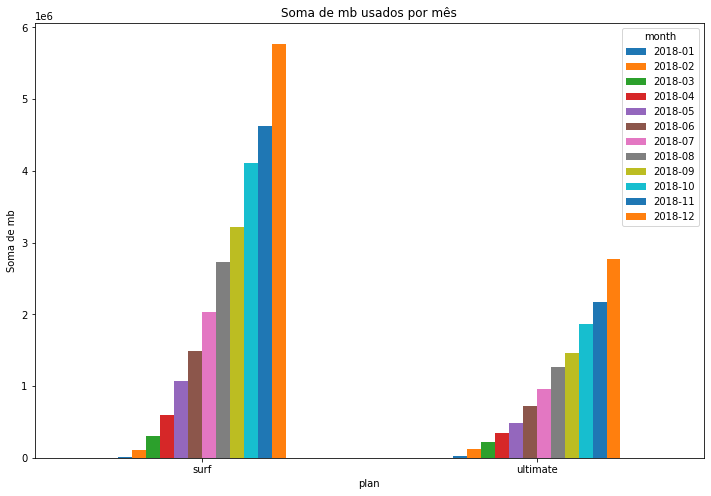

In [125]:
# visualizando a soma dos Mb usados por mês por plano

sum_internet_plan.plot(kind='bar', figsize=(12,8))
plt.title('Soma de mb usados por mês')
plt.ylabel('Soma de mb')
plt.xticks(rotation=0)
plt.show()

tanto quanto no exemplo das mensagens, vemos que na soma total de consumo, o plano que consome mais durante o ano é o plano surf, quando comparado com as médias, podemos concluir que existem mais clientes do plano surf do que do plano ultimate.

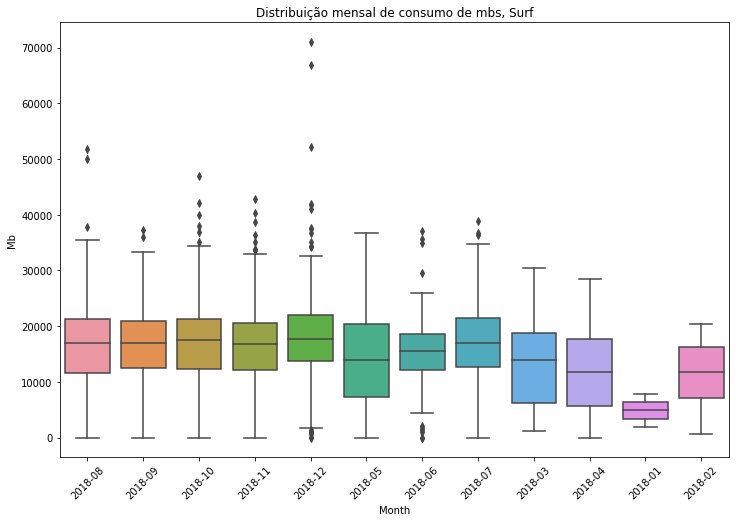

In [126]:
# plotando distribuição mensal de consumo de internet por mês do plano Surf

plt.figure(figsize=(12, 8))
sns.boxplot(data=surf_merged_filter, x='month', y='mb_used')
plt.title('Distribuição mensal de consumo de mbs, Surf')
plt.xlabel('Month')
plt.ylabel('Mb')
plt.xticks(rotation=45) 
plt.show()

grande quantidade de outliers entre os usuários do plano surf, mediana muito similar nos ultimos quatro meses do ano.

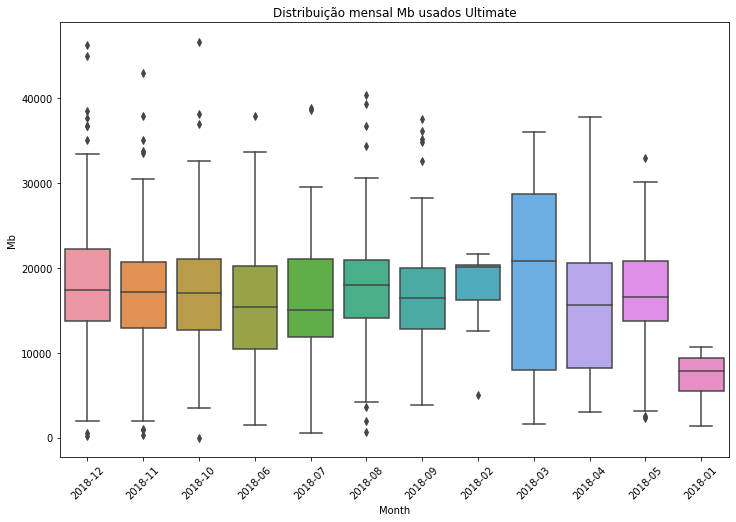

In [127]:
# plotando distribuição mensal de consumo de internet por mÇes do plano surf

plt.figure(figsize=(12, 8))
sns.boxplot(data=ultimate_merged_filter, x='month', y='mb_used')
plt.title('Distribuição mensal Mb usados Ultimate')
plt.xlabel('Month')
plt.ylabel('Mb')
plt.xticks(rotation=45) 
plt.show()

Vemos que os quartis no grafíco acima são maiores do que os do plano anterior.

 ### Conclusão analise dos graficos

Podemos concluir que em média os uauários do plano ultimate consomem mais em mensagens e consumo de internet porém somados ficam atrás dos usuários do plano surf, devido a quantidade de usuários do plano surf serem maiores que a quantidade de usuários do plano ultimate. Entre as chamadas tanto em média quanto em soma, o plano surf demontra maiores números.

## Receita

In [128]:
# quantidade de usuários do plano surf

len(surf_merged_filter)

1573

In [129]:
# quantidade de usuários do plano ultimate

len(ultimate_merged_filter)

720

In [130]:
# receita total do plano surf no ano 2018

surf_merged_filter['total'].sum()

95631.18

In [131]:
# receita total do plano ultimate no ano 2018

ultimate_merged_filter['total'].sum()

52080.0

In [132]:
incoming_difference = 100*(surf_merged_filter['total'].sum()/ultimate_merged_filter['total'].sum()-1)

incoming_difference

83.62361751152072

o plano surf gera 83% mais receita do que o plano ultimate

In [133]:
# criando tabela dinamica da media da receita por mes por plano 

mean_income_merged = pd.pivot_table(merged_all_info, index='plan', columns='month', values='total', aggfunc='mean')

mean_income_merged

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,20.0,34.396667,45.941304,40.7106,47.628182,49.276289,62.839339,64.054630,58.271495,65.590000,58.110283,70.651384
ultimate,70.0,70.000000,74.666667,73.0000,70.724138,71.638298,71.898305,72.859155,72.034884,72.311321,71.763780,73.337748


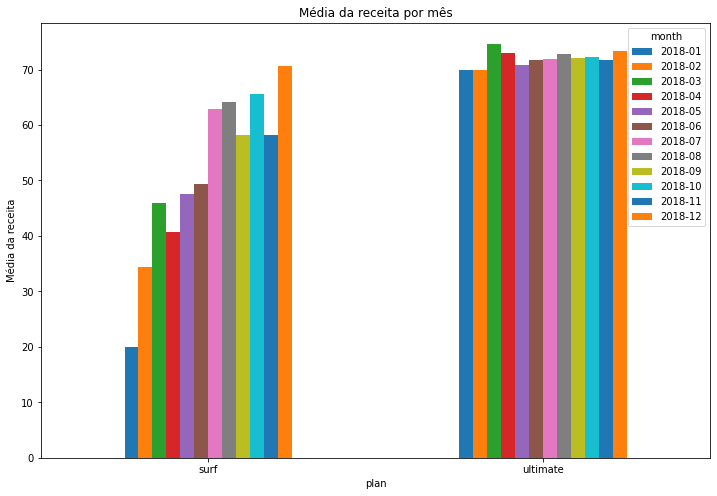

In [134]:
mean_income_merged.plot(kind='bar', figsize=(12,8))

plt.title('Média da receita por mês')
plt.ylabel('Média da receita')
plt.xticks(rotation=0)
plt.show()

clientes do plano ultimate gastam em média mais do que todos os meses comparados com os meses do plano surf

In [135]:
# criando tabela dinamica da soma da receita por mes por plano 

sum_income_merged = pd.pivot_table(merged_all_info, index='plan', columns='month', values='total', aggfunc='sum')

sum_income_merged

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,40.0,309.57,1056.65,2035.53,3667.37,4779.8,7603.56,10376.85,11304.67,15544.83,16445.21,22467.14
ultimate,280.0,490.00,896.00,1533.00,2051.00,3367.0,4242.00,5173.00,6195.00,7665.00,9114.00,11074.00


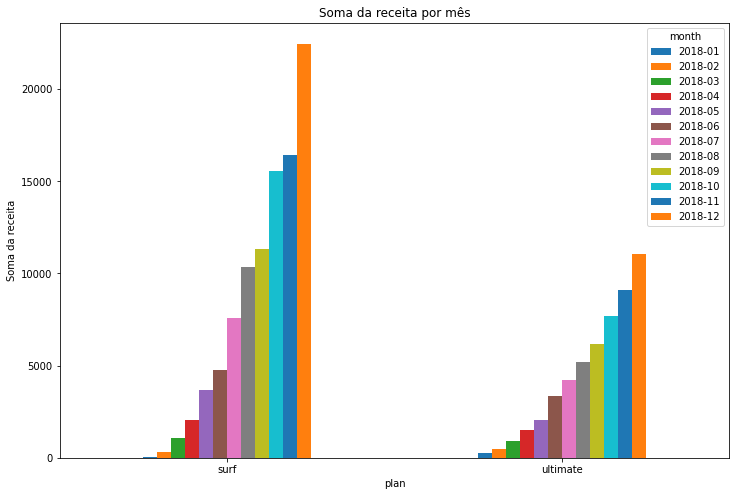

In [136]:
sum_income_merged.plot(kind='bar', figsize=(12,8))

plt.title('Soma da receita por mês')
plt.ylabel('Soma da receita')
plt.xticks(rotation=0)
plt.show()

percebemos que a receita vinda dos usuários do plano surf é maior na somatória do que os usuários do plano ultimate

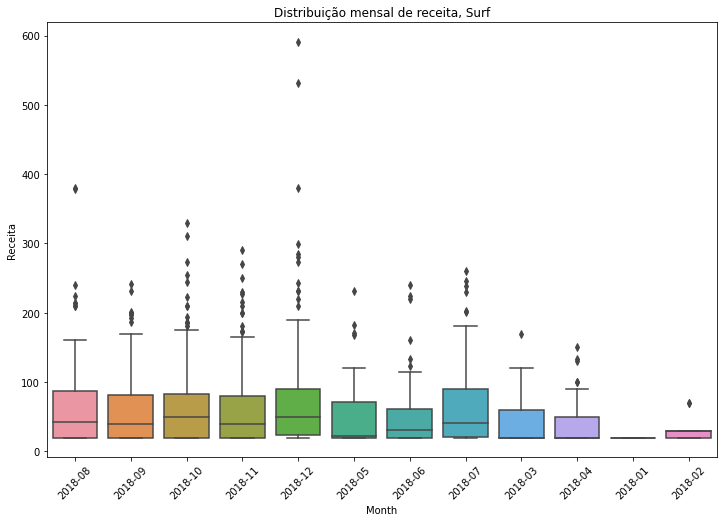

In [137]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=surf_merged_filter, x='month', y='total')
plt.title('Distribuição mensal de receita, Surf')
plt.xlabel('Month')
plt.ylabel('Receita')
plt.xticks(rotation=45) 
plt.show()

muitos outliers na receita dos clientes surf, quartis ficam abaixo dos 100.

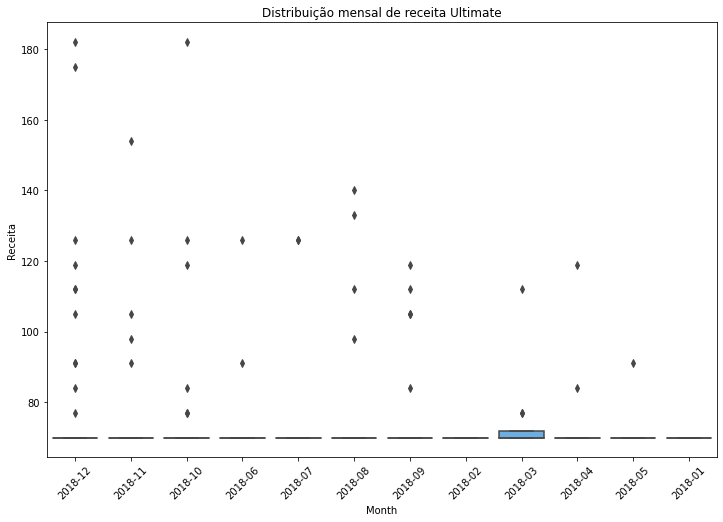

In [138]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=ultimate_merged_filter, x='month', y='total')
plt.title('Distribuição mensal de receita Ultimate')
plt.xlabel('Month')
plt.ylabel('Receita')
plt.xticks(rotation=45) 
plt.show()

In [139]:
# criando tabela dinamica da soma da receita por mes por plano 

mean_overspent_merged = pd.pivot_table(merged_all_info, index='plan', columns='month', values='total_overspent', aggfunc='mean')

mean_overspent_merged

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,0.0,14.396667,25.941304,20.7106,27.628182,29.276289,42.839339,44.054630,38.271495,45.590000,38.110283,50.651384
ultimate,0.0,0.000000,4.666667,3.0000,0.724138,1.638298,1.898305,2.859155,2.034884,2.311321,1.763780,3.337748


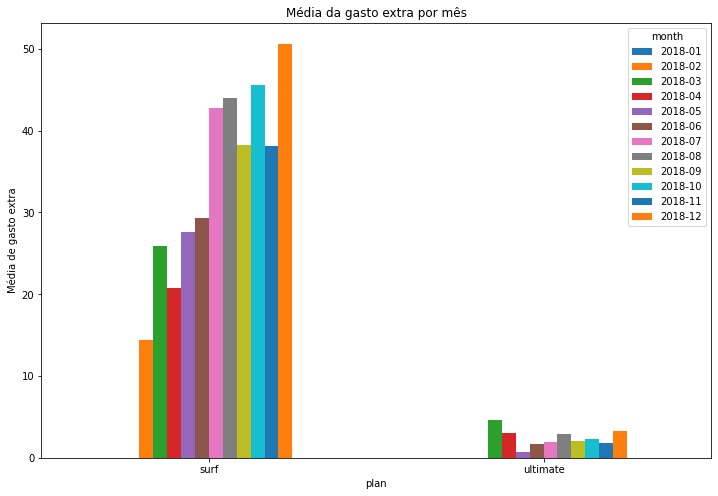

In [140]:
# plotando a média de gastos extra mensais por plano

mean_overspent_merged.plot(kind='bar', figsize=(12,8))

plt.title('Média da gasto extra por mês')
plt.ylabel('Média de gasto extra')
plt.xticks(rotation=0)
plt.show()

Quando visualiamos os gastos extra por usuário do plano, vemos que os usuários do plano surf tendem a gastar muito mais em média do que os do plano ultimate por fora do plano.

In [141]:
# criando tabela dinamica da soma da receita por mes por plano 

sum_overspent_merged = pd.pivot_table(merged_all_info, index='plan', columns='month', values='total_overspent', aggfunc='sum')

sum_overspent_merged

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
plan,,,,,,,,,,,,
surf,0.0,129.57,596.65,1035.53,2127.37,2839.8,5183.56,7136.85,7424.67,10804.83,10785.21,16107.14
ultimate,0.0,0.00,56.00,63.00,21.00,77.0,112.00,203.00,175.00,245.00,224.00,504.00


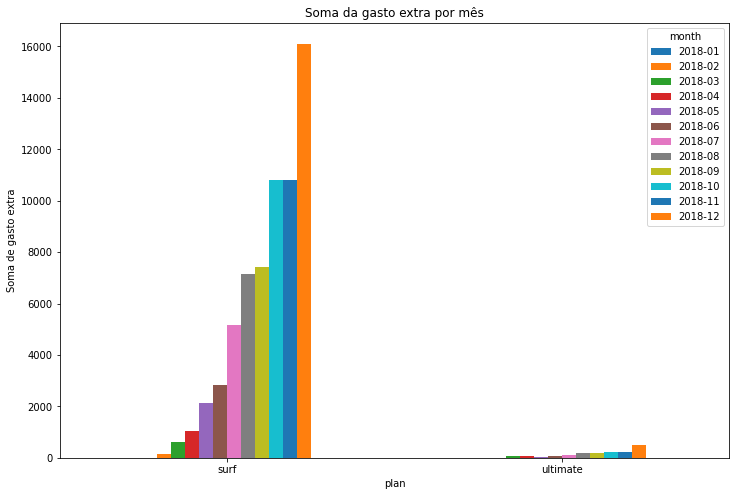

In [142]:
# plotando a soma de gastos extras mensais por plano

sum_overspent_merged.plot(kind='bar', figsize=(12,8))

plt.title('Soma da gasto extra por mês')
plt.ylabel('Soma de gasto extra')
plt.xticks(rotation=0)
plt.show()

novamente, verificamos pelo gráfico acima, o quanto os usuários do plano ultimate ficam dentro do seu plano comparado com os usuários do plano surf

In [143]:
# soma de gastos extra fora do plano 'ultimate'

ultimate_merged_filter['total_overspent'].sum()

1680.0

In [144]:
# soma de gastos extra fora do plano 'surf'

surf_merged_filter['total_overspent'].sum()

64171.18

In [145]:
# calculando a porcentagem de gasto extra a mais por plano

incoming_difference_overspent = 100*(surf_merged_filter['total_overspent'].sum()/ultimate_merged_filter['total_overspent'].sum()-1)

incoming_difference_overspent

3719.7130952380953

Achamos um dado muito significativo, usuários do plano surf geram receita 3713% a mais do que o usuários do plano 'ultimate' com gastos além do contrato do plano.

## Testar hipóteses estatísticas

Hipotese Nula : A receita media dos usuarios dos planos Ultimate e Surf sao iguais

Hipotese Alternativa : A receita media dos usuarios dos planos Ultimate e Surf sao diferentes

In [146]:
# definindo valor alpha

alpha = 0.05

In [156]:
# utilizando teste de levene para definir se equal_var = False ou True

statistic, p_value = levene(ultimate_merged_filter['total'], surf_merged_filter['total'])

In [157]:
# resultado do teste de levene

print("Levene's test statistic:", statistic)
print("p-value:", p_value_levene)

Levene's test statistic: 406.5053238307018
p-value: 2.3614579293558526e-83


In [158]:
# funcao if para demonstrar se equal_var e falso ou verdadeiro

if p_value_levene < alpha:
    equal_var = False
else:
    equal_var = True

In [159]:
# fazendo ttest entre a media de receitas dos usarios de cada plano

results = st.ttest_ind(ultimate_merged_filter['total'], surf_merged_filter['total'], equal_var = equal_var)

In [160]:
# imprimindo p-valor

print('p-value :', results.pvalue)

p-value : 5.1234033722747646e-15


In [161]:
# resultado do teste

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Nós não podemos rejeitar a hipótese nula")

Rejeitamos a hipótese nula


Hipotese Nula : A receita media dos usuarios de area NY-NJ f sao iguais aos das demais regioes

Hipotese Alternativa : A receita media dos usuarios da area NY-NJ sao diferentes das demais regioes

In [162]:
# adicionando coluna 'city' por usuário

merged_all_info = merged_all_info.merge(ml_user[['user_id', 'city']], on='user_id', how='left')

In [163]:
# verificando se dados mergiram

merged_all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2293 non-null   int64    
 1   month                  2293 non-null   period[M]
 2   mb_used                2293 non-null   float64  
 3   msg_count              2293 non-null   float64  
 4   duration               2293 non-null   float64  
 5   calls                  2293 non-null   float64  
 6   plan                   2293 non-null   object   
 7   messages_included      2293 non-null   int64    
 8   mb_per_month_included  2293 non-null   int64    
 9   minutes_included       2293 non-null   int64    
 10  usd_monthly_pay        2293 non-null   int64    
 11  usd_per_gb             2293 non-null   int64    
 12  usd_per_message        2293 non-null   float64  
 13  usd_per_minute         2293 non-null   float64  
 14  overspent_minutes      2

In [164]:
# filtrando por usuarios de NY

ny_user = merged_all_info.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [166]:
# filtrando por usuarios de regiaos que nao NY

other_regions_user = merged_all_info.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [ ]:
# ultilizando teste de levene para definir se equal_Var e False ou True

statistic, p_value = levene(ny_user['total'], other_regions_user['total'])

In [169]:
# resultado do teste de levene

print("Levene's test statistic:", statistic)
print("p-value:", p_value)

Levene's test statistic: 406.5053238307018
p-value: 2.3614579293558526e-83


In [170]:
# funcao if para demonstrar se equal_var e falso ou verdadeiro

if p_value < alpha:
    equal_var1 = False
else:
    equal_var1 = True

In [171]:
# fazendo ttest entre a media de receitas dos usuarios que sao de NY e ioutras regioes

results1 = st.ttest_ind(ny_user['total'], other_regions_user['total'] , equal_var = equal_var1)

In [172]:
# imprimindo p-valor

print('p-value :', results1.pvalue)

p-value : 0.03408041222493359


In [173]:
# resultado do teste

if results1.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Nós não podemos rejeitar a hipótese nula")

Rejeitamos a hipótese nula


## Conclusão geral



Os dados foram carregados e separadamente salvos de acordo com as informações que continham. Dados de chamadas, consumo de dados, mensagens, plano e usuários. Em todos os dados haviam tipos de dados que precisavam ser mudados, os dados de datas se encontravam em froam de objeto e foram trocados para foramto de data, e todos os tipos de dados em 'user_ID' foram trocados para valores inteiros. Alguams colunas foram renomeadas para facilitar a união das tabelas.

Nos dados dos usuários, defini as datas ausentes em 'churn_date' para 01/01/2019. Para que possamos mensurar quanto tempo os usuários tem seu plano ativo, a data foi escolhida baseada na visualização das datas dentro dos dados. Todos os dados correspondem ano de 2018.
Enriquecemos os dados dos usuários adicionando uma coluna que mostrasse quanto tempo de contrato cada cliente teve no plano.

Nos dados das chamadas arredondei os valores da chamada para cima, já que independetemente to uso do minuto total, o cliente será cobrado pelo minuto. També, foram eliminadas linhas com duração igual a 0, essas colunas representam chamadas perdidas.
Após isso, enriqueci os dados com a soma total de minutos ultilizados por cada usuário por mês.

Nos dados de mensagens, também os enriqueci adicionando o valor total de mensagens enviadas por usuários por mês.

Nos dados de consumo de dados, também arredondei o consumo de dados para cima e somei os total de uso de cada usuário por mês.

Agrupei os dados com a quantidade de chamadas feitas pelo usuário por cada mês.

Com dados enriquecidos e novos grupos de dados relevantes salvos em novas variaveis, comecei a juntar os dados em uma tabela geral que foi chamada de 'merged_all_info'. Apos a junção, percebi que não existiam valores 0 em algumas colunas que tinham valores ausentes, supus que os valores ausentes, significam o mesmo que valores 0, e substitui todos os valores ausentes por 0. Isso, também pensado para facilitar a matemática que seria usada nos dados mais à frente.

Novamente, pude enriquecer essa nova tabela geral de dados, com novas colunas que representam a quantidade de minutos, mensagens e dados gastas por cada usuário, fora do que está incluso no plano contratado. Nos dados de sobre consumo de dados atualizei o formato de megabytes para gigabytes para facilitar o calculo da receita gasta por cada usuário mensalmente.

Começamos a partir daí, analisar visualmente os dados plotando alguns graficos.

Comparei e analisei mês a mÊs o consumo médio de minutos por mês dos usuários de cada plano. Foi possível ver uma tendência de aumento de chamadas ao longo dos meses do ano, o padrão de consumo aumenta conforme o ano passa. Os picos foram em Julho e Dezembro. Acredito que esse padrão exista devido as festividades de final de ano e as férias no meio do ano. A soma geral dos minutos usados mostram claramente que os clientes do plano surf consomem mais minutos do que os clientes do plano 'surf', porém média nem tanto, devido a quantidade menor de clientes no plano 'ultimate'.

Também observamos dentro dos gráficos 'box' mais outliers dentro dos usuários do plano surf do que os usuários do plano ultimate.

Analisamos após plotar o gráfico com a média mensal de uso de mensagens de texto por mês dos usuários de cada plano. Foi possível observar a mesma tendência de consumo, sendo o início do ano os meses de menor consumo e ao decorrer do ano o consumo aumenta, tendo pico médio em Dezembro.
Outra vez, quando visualizamos a soma total do consumo dos usuários por mês, notamos que a média do 'ultimate' é similar ao do 'surf', mas na soma total o valor é bem menor comparado, mais uma vez, atribuo ao número menor de usuários do plano 'ultimate'.

Quando visualizamos os graficos em box dos dois dados, encontramos diversos outliers nos usuários do plano 'surf' e pouquíssimos outliers no usuários do plano 'ultimate'. Quando comparado, os quartis dos usuários 'ultimate' são bem maiores, o que pode representar que usuários do 'ultimate' gastam mais dentro do valor do contrato.

Nos dados de consumo de dados, vemos que a por média os usuários do 'ultimate' gastam mais do que os do 'surf' na maioria dos meses, novamente vemos o pico em Dezembro, porém chama a atenção um pico de uso de dados do usuários do plano 'ultimate' em Março. Na soma dos dados vemos a mesma conclusão, por terem mais usuários no plano 'surf' o total de consumo demonstrou ser sempre maior do que os usuários do outro plano.

Concluimos que o plano surf gera 83% mais receita em total do que o plano ultimate.

Novamente, em média os usuários do 'ultimate' gastam mais.

Calculamos e demonstramos em gráficos, a quantidade de receita gerada por usuários por fora do plano. Dentro dessa análise foi significativo ver o gasto maior dos clientes 'surf' quando comparados aos dos usuarios do 'ultimate' Usuáridos do plano 'surf' geram uma receita 3719% maior com custos fora do plano 'surf' do que do 'ultimate'.

Vendo que na maioria dos casos a média de gasto é maior dentro do plano ultimate, a equipe de marketing deveria concentrar o orçamento tentando trazer os usuários do plano 'surf' para o 'ultimate'.

Por fim, testamos algumas hipóteses comparando suas médias.

Primeiro teste, H0 = A receita media dos usuarios dos planos Ultimate e Surf sao iguais 
                HA = A receita media dos usuarios dos planos Ultimate e Surf sao diferentes
                
Utilizamos o ttest para verificar a hipótese e rejeitamos a hipótese nula, e aceitamos a hipótese alternativa.

Segundo teste, H0 = A receita media dos usuarios de area NY-NJ f sao iguais aos das demais regioes
               HA = A receita media dos usuarios da area NY-NJ sao diferentes das demais regioes
               
Utilizamos o ttest para verificar a hipótese e rejeitamos a hipótese nula, e aceitamos a hipótese alternativa.














